Mean Absolute Error: 12.259843935391864
     Roll no  Exam score
0   EXA32000   73.780000
1   EXA32001   69.186476
2   EXA32002   57.780000
3   EXA32003   72.445000
4   EXA32004   67.800000
..       ...         ...
95  EXA32095   73.928333
96  EXA32096   68.160000
97  EXA32097   76.388500
98  EXA32098   60.010000
99  EXA32099   75.808333

[100 rows x 2 columns]


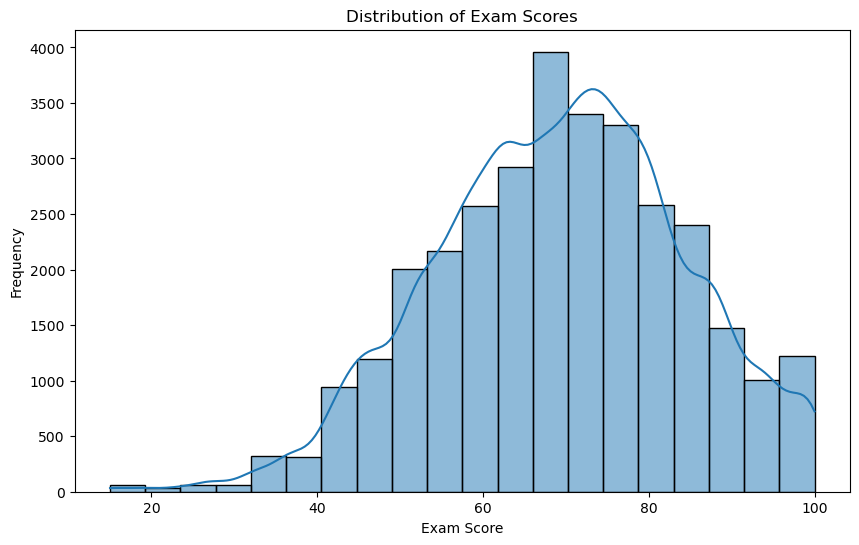

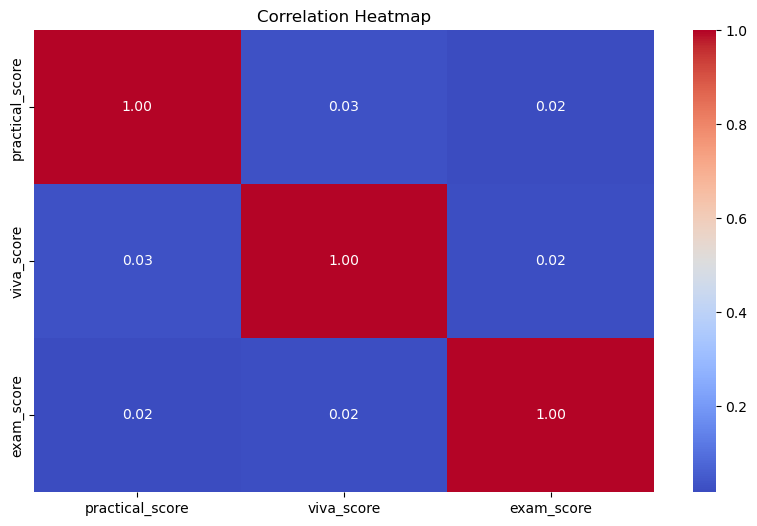

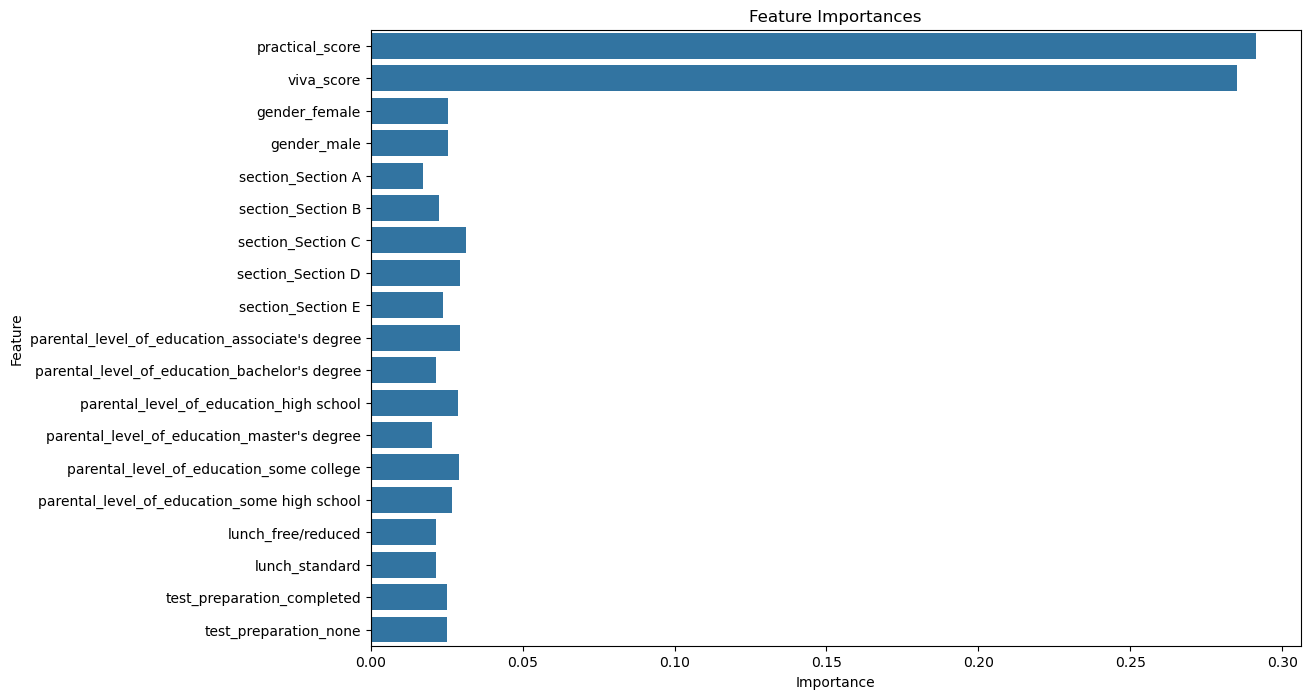

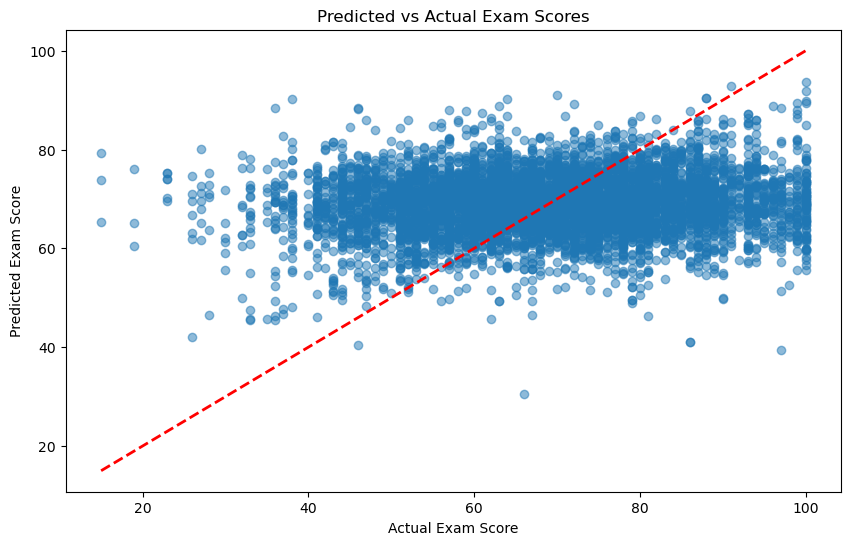

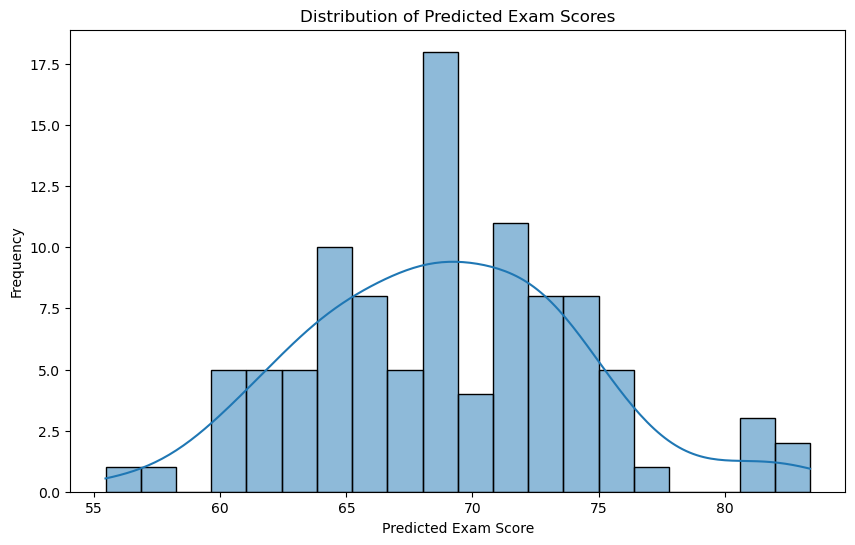

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Standardize column names
train_df.columns = [col.strip().lower().replace(' ', '_') for col in train_df.columns]
test_df.columns = [col.strip().lower().replace(' ', '_') for col in test_df.columns]

# Define features and target variable
X = train_df.drop(columns=['roll_no', 'exam_score'])
y = train_df['exam_score']

# Define categorical and numerical columns
categorical_features = ['gender', 'section', 'parental_level_of_education', 'lunch', 'test_preparation']
numerical_features = ['practical_score', 'viva_score']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error: {mae}')

# Predict on the test set
X_test = test_df.drop(columns=['roll_no'])
test_predictions = model.predict(X_test)

# Prepare the submission file
submission_df = pd.DataFrame({'Roll no': test_df['roll_no'], 'Exam score': test_predictions})
submission_df.to_csv('submission.csv', index=False)

# Load the submission file
submission_df = pd.read_csv('submission.csv')

# Display the first few rows of the submission file
print(submission_df)

# Optionally, display the entire file if it's not too large
# print(submission_df)


# Plotting

# Histogram of Exam Scores
plt.figure(figsize=(10, 6))
sns.histplot(train_df['exam_score'], bins=20, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = train_df[['practical_score', 'viva_score', 'exam_score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Feature Importance Plot
# Extract feature importances from the trained model
feature_names = numerical_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())
importances = model.named_steps['regressor'].feature_importances_

plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Predicted vs Actual Scores
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Exam Scores')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.show()

# Distribution of Predictions
plt.figure(figsize=(10, 6))
sns.histplot(test_predictions, bins=20, kde=True)
plt.title('Distribution of Predicted Exam Scores')
plt.xlabel('Predicted Exam Score')
plt.ylabel('Frequency')
plt.show()
